In [4]:
from google.colab import drive
drive.mount('/content/drive')
caminho = "/content/drive/MyDrive/CDSI/MaterialApoio/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

In [6]:
base_risco_credito = pd.read_csv(caminho + "/risco_credito.csv")
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [7]:
X_risco_credito = base_risco_credito.iloc[:,0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [8]:
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantia = LabelEncoder()
label_enconder_renda = LabelEncoder()

In [10]:
X_risco_credito[:,0] = label_enconder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_enconder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_enconder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_enconder_renda.fit_transform(X_risco_credito[:,3])

In [11]:
import pickle as pkl
with open('label_enconder_historia.pkl', 'wb') as f:
  pkl.dump([X_risco_credito, y_risco_credito],f)

In [12]:
from sklearn.naive_bayes import GaussianNB
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [13]:
# Historia - boa(0), divida - alta(0), garantia - nenhuma(1), renda - > 35(2)
# Historia - ruim(2), divida - alta(0), garantia - adequada(0), renda - < 15(0)
previsao = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

In [14]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [15]:
from sklearn.naive_bayes import BernoulliNB
naive_risco_credito_b = BernoulliNB()
naive_risco_credito_b.fit(X_risco_credito, y_risco_credito)

BernoulliNB()

In [16]:
# Historia - boa(0), divida - alta(0), garantia - nenhuma(1), renda - > 35(2)
# Historia - ruim(2), divida - alta(0), garantia - adequada(0), renda - < 15(0)
previsao_b = naive_risco_credito_b.predict([[0,0,1,2],[2,0,0,0]])

In [17]:
previsao_b

array(['baixo', 'alto'], dtype='<U8')

In [18]:
from sklearn.naive_bayes import MultinomialNB
naive_risco_credito_m = MultinomialNB()
naive_risco_credito_m.fit(X_risco_credito, y_risco_credito)

MultinomialNB()

In [19]:
# Historia - boa(0), divida - alta(0), garantia - nenhuma(1), renda - > 35(2)
# Historia - ruim(2), divida - alta(0), garantia - adequada(0), renda - < 15(0)
previsao_m = naive_risco_credito_m.predict([[0,0,1,2],[2,0,0,0]])

In [20]:
previsao_m

array(['baixo', 'alto'], dtype='<U8')

In [21]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [22]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [23]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

# Base - Credit Data

In [24]:
with open(caminho + "/credit.pkl", "rb") as f:
  X_credit_train, y_credit_train, X_credit_test, y_credit_test = pkl.load(f)

In [25]:
X_credit_train.shape, y_credit_train.shape

((1500, 3), (1500,))

In [26]:
X_credit_test.shape, y_credit_test.shape


((500, 3), (500,))

In [27]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_train, y_credit_train)

GaussianNB()

In [28]:
previsao_credit = naive_credit_data.predict(X_credit_test)
previsao_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
accuracy_score(y_credit_test, previsao_credit)

0.938

In [32]:
confusion_matrix(y_credit_test, previsao_credit)

array([[428,   8],
       [ 23,  41]])

In [33]:
from yellowbrick.classifier import ConfusionMatrix

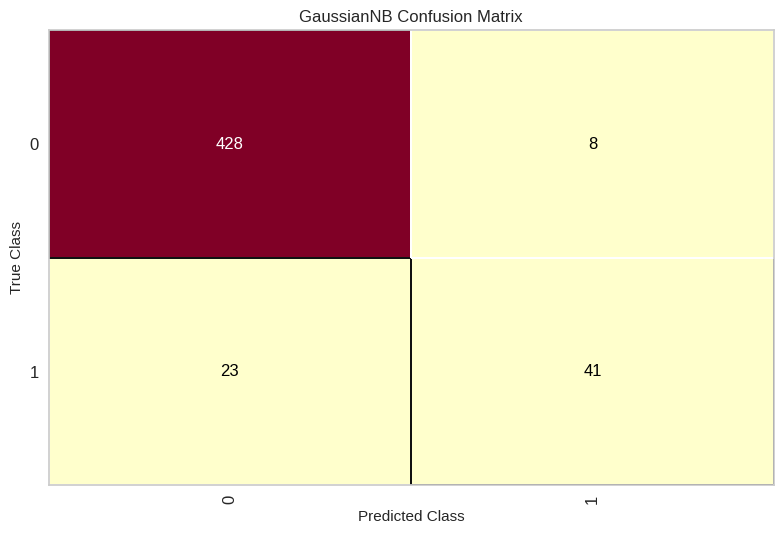

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)
cm.show()

In [35]:
print(classification_report(y_credit_test, previsao_credit))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



### Usando BernoulliNB

In [36]:
naive_credit_data_b = BernoulliNB()
naive_credit_data_b.fit(X_credit_train, y_credit_train)

BernoulliNB()

In [37]:
previsao_credit_b = naive_credit_data_b.predict(X_credit_test)

In [38]:
accuracy_score(y_credit_test, previsao_credit_b)

0.872

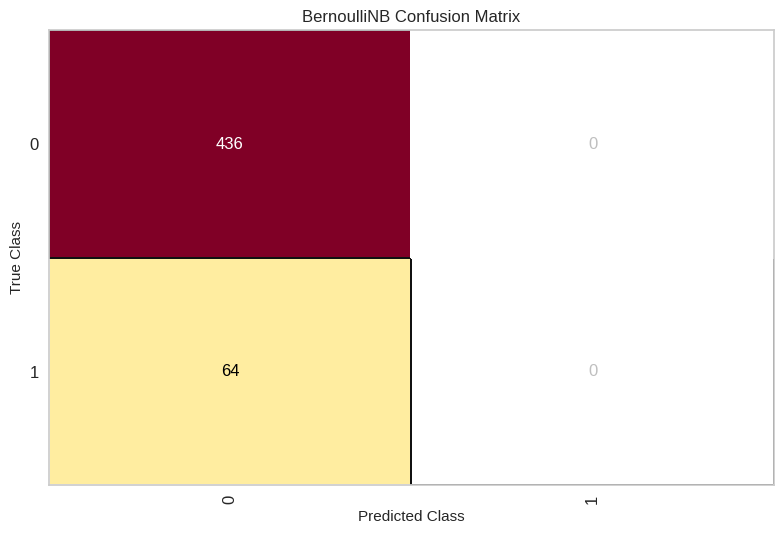

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
cm_b = ConfusionMatrix(naive_credit_data_b)
cm_b.fit(X_credit_train, y_credit_train)
cm_b.score(X_credit_test, y_credit_test)
cm_b.show()

In [40]:
print(classification_report(y_credit_test, previsao_credit_b))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       436
           1       0.00      0.00      0.00        64

    accuracy                           0.87       500
   macro avg       0.44      0.50      0.47       500
weighted avg       0.76      0.87      0.81       500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
with open(caminho + "/census.pkl", "rb") as f:
  X_census_train, y_census_train, X_census_test, y_census_test = pkl.load(f)

In [42]:
X_census_train.shape, y_census_train.shape

((27676, 108), (27676,))

In [43]:
X_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

GaussianNB

In [44]:
naive_census_data = GaussianNB()
naive_census_data.fit(X_census_train, y_census_train)

GaussianNB()

In [45]:
previsao_census = naive_census_data.predict(X_census_test)

In [46]:
accuracy_score(y_census_test, previsao_census)

0.4767656090071648

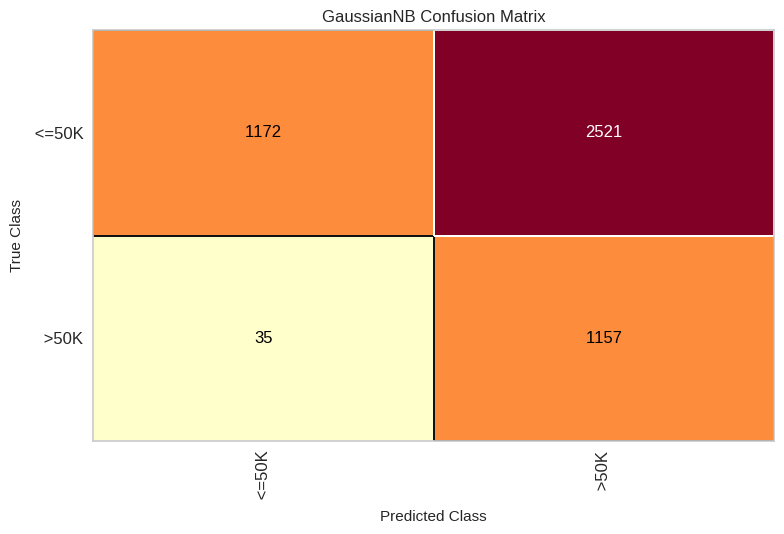

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [47]:
cm_census = ConfusionMatrix(naive_census_data)
cm_census.fit(X_census_train, y_census_train)
cm_census.score(X_census_test, y_census_test)
cm_census.show()

In [48]:
print(classification_report(y_census_test, previsao_census))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



BernoulliNB

In [49]:
naive_census_data_b = BernoulliNB()
naive_census_data_b.fit(X_census_train, y_census_train)

BernoulliNB()

In [50]:
previsao_census_b = naive_census_data_b.predict(X_census_test)

In [51]:
accuracy_score(y_census_test, previsao_census_b)

0.7805527123848516

0.7805527123848516

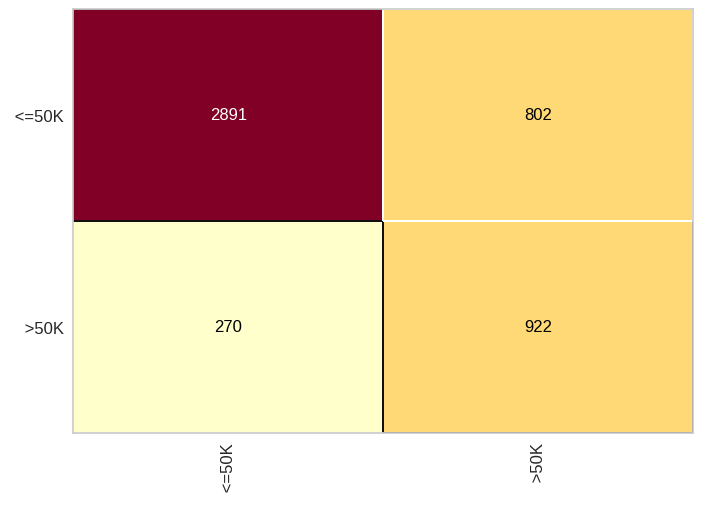

In [52]:
cm_census_b = ConfusionMatrix(naive_census_data_b)
cm_census_b.fit(X_census_train, y_census_train)
cm_census_b.score(X_census_test, y_census_test)

In [53]:
print(classification_report(y_census_test, previsao_census_b))

              precision    recall  f1-score   support

       <=50K       0.91      0.78      0.84      3693
        >50K       0.53      0.77      0.63      1192

    accuracy                           0.78      4885
   macro avg       0.72      0.78      0.74      4885
weighted avg       0.82      0.78      0.79      4885

